# <center><font color='Blue' face='comic sans ms'> Weather Prediction </font></center> 
# <center><font color='Purple' face='comic sans ms'> Depending on .. </font></center> 

<b>Problem on Hand: </b> Develop a machine learning model to accurately forecast weather conditions using historical data, providing users with reliable predictions for planning their activities.</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

## <font color='Blue' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [15]:
weath_org=pd.read_csv("seattle-weather.csv")
weath_org.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


## <font color='Blue' face='Cursive'> Data Cleaning and Preparation</font>

In [16]:
weath_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


- <font color = 'Magenta'> There are  1461 rows in the data set</font>
 - <font color = 'Magenta'> There are 6 columns in the data set provided</font>
 - <font color = 'Magenta'> All the columns are of type Object.</font>
 


In [17]:
#create the copy of the data set
weath_cpy=weath_org.copy()

In [18]:
weath_cpy.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [19]:
#removing leading and trailing edges
weath_cpy.columns=weath_cpy.columns.str.strip()

#After removing column stripping
print("After Removing column strips spaces ",weath_cpy.columns)

After Removing column strips spaces  Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [20]:
weath_cpy.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [21]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<font color = 'Green'> Let us check [value counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) for all columns</font>

In [22]:
weath_cpy.precipitation.value_counts()

precipitation
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: count, Length: 111, dtype: int64

In [23]:
weath_cpy.temp_max.value_counts()

temp_max
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: count, Length: 67, dtype: int64

In [24]:
weath_cpy.temp_min.value_counts()

temp_min
 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: count, dtype: int64

In [25]:
weath_cpy.wind.value_counts()

wind
2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: count, Length: 79, dtype: int64

In [33]:
weath_cpy.weather.value_counts()

weather
RAIN       641
SUN        640
FOG        101
DRIZZLE     53
SNOW        26
Name: count, dtype: int64

<font color = 'green'> Trimming all categorical columns to make sure there are no leading and trailing spacces and no double space between Words </font>

In [29]:
weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).strip().replace("  "," "))



<font color = 'Green'> It can also be seen that some of the job titles are in Upper case. so with Lowe and with mix of both which might effect analysis, so converting them to  uppercase</font>

In [30]:

weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).upper())
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).upper())
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).upper())
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).upper())
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).upper())
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).upper())

In [31]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,DRIZZLE
1,2012-01-02,10.9,10.6,2.8,4.5,RAIN
2,2012-01-03,0.8,11.7,7.2,2.3,RAIN
3,2012-01-04,20.3,12.2,5.6,4.7,RAIN
4,2012-01-05,1.3,8.9,2.8,6.1,RAIN
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,RAIN
1457,2015-12-28,1.5,5.0,1.7,1.3,RAIN
1458,2015-12-29,0.0,7.2,0.6,2.6,FOG
1459,2015-12-30,0.0,5.6,-1.0,3.4,SUN


## <font color='Magenta' face='Cursive'>Exploratory Data Analysis</font>

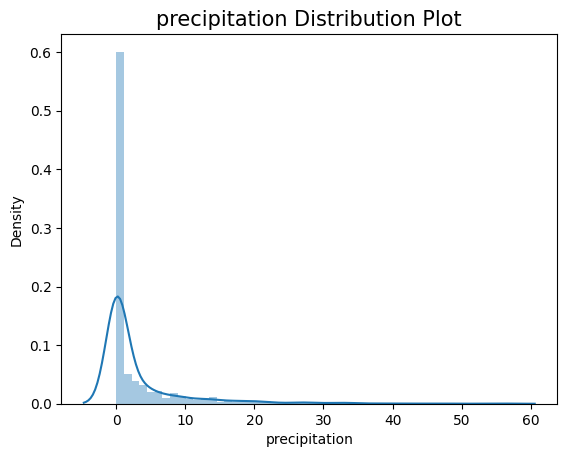

In [42]:
# Check distribution of Variables
sns.distplot(weath_cpy.precipitation)
plt.title("precipitation Distribution Plot",fontsize=15)
plt.show()

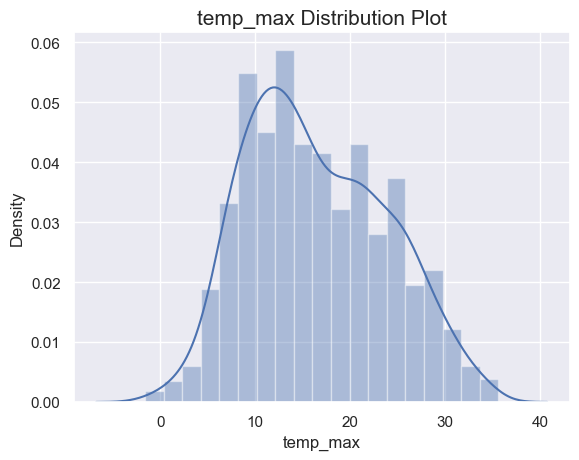

In [46]:
sns.distplot(weath_cpy.temp_max)
plt.title("temp_max Distribution Plot",fontsize=15)
plt.show()

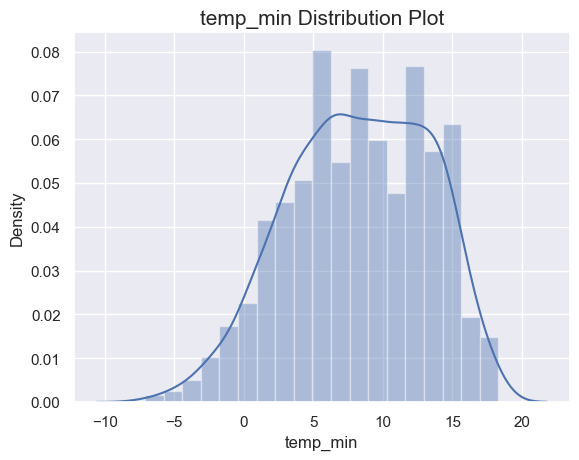

In [47]:
sns.distplot(weath_cpy.temp_min)
plt.title("temp_min Distribution Plot",fontsize=15)
plt.show()

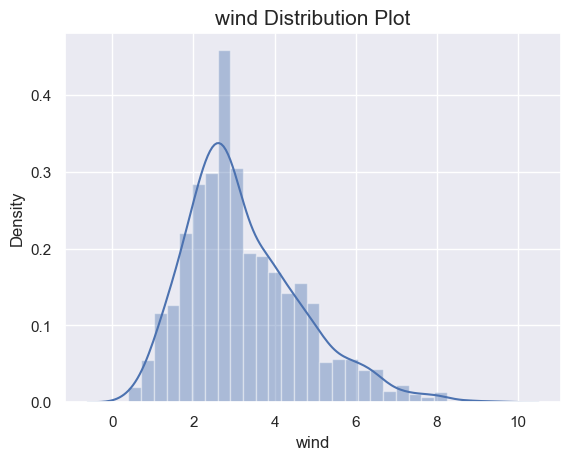

In [48]:

sns.distplot(weath_cpy.wind)
plt.title("wind Distribution Plot",fontsize=15)
plt.show()

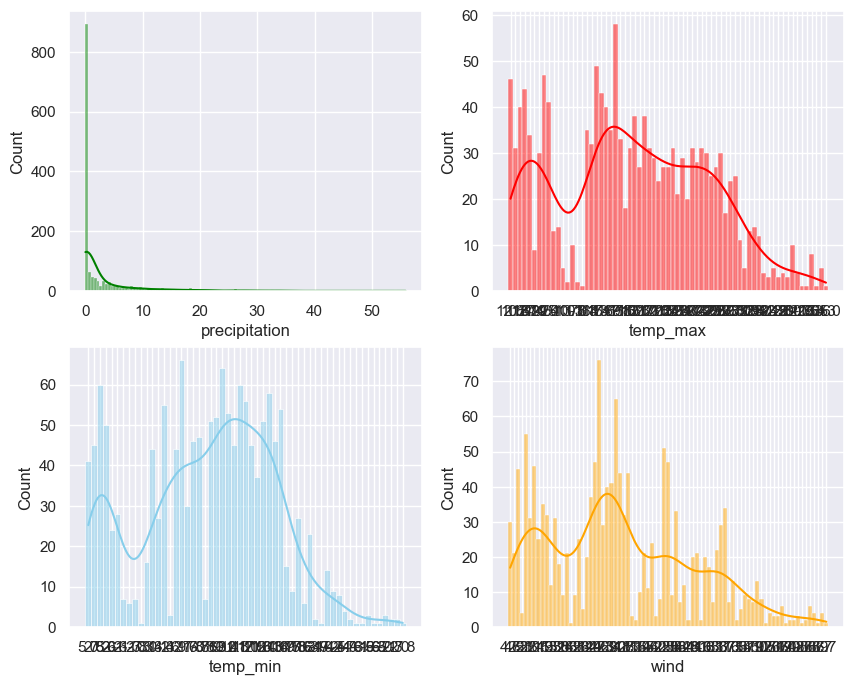

In [49]:
#Creating histogram 
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Assuming 'data' is your dataset
# Replace this with your actual dataset
data =weath_cpy

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

plt.show()
